# Kelompok 1

1. Muhammad Dajuma Fenori (205150207111051)
2. Amry Yahya             (205150200111064)
3. Fitria Nur Afifah      (205150201111053)

# Load Dataset 

In [ ]:
import pandas as pd
import numpy as np
import scipy.sparse as sparse
import time, warnings
import datetime as dt
import seaborn as sb
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples,silhouette_score

In [ ]:
! wget -O "online_retail.xlsx"  'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

--2023-01-01 00:05:07--  https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23715344 (23M) [application/x-httpd-php]
Saving to: ‘online_retail.xlsx’

online_retail.xlsx  100%[===================>]  22.62M  48.7MB/s    in 0.5s    

2023-01-01 00:05:08 (48.7 MB/s) - ‘online_retail.xlsx’ saved [23715344/23715344]



In [ ]:
df = pd.read_excel(r"/content/online_retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#Identifikasi Masalah 

Beberapa perusahaan tidak dapat menggunakan informasi yang dapat memperkuat bisnis perusahaan secara optimal seperti penggunaan Customer Relationship Management (CRM) untuk mendapatkan wawasan tentang permintaan dan kebutuhan pelanggan. Selain itu, meskipun kombinasi data pengguna penambangan dan metode komputasi telah digunakan, pendekatan tersebut memiliki beberapa keterbatasan. Selain itu, hanya sedikit penelitian yang menggunakan model RFM dalam memahami pengguna. Selain itu, teknik data mining yang diterapkan di lingkungan bisnis belum bersifat deskriptif. Untuk mengatasi masalah tersebut, metode penambangan dua langkah diimplementasikan dalam penelitian ini. Model Recency Frequency Monetary (RFM) digunakan sebagai dasar untuk membuat segmentasi nasabah berdasarkan Customer Recency, Frequency, dan Monetary. Langkah pertama, data diekstraksi ke dalam model RFM kemudian dilakukan clustering menggunakan algoritma k-Means. Pada langkah kedua, data di setiap cluster dianalisis menggunakan analisis asosiasi untuk membuat karakteristik pelanggan yang direpresentasikan oleh aturan IF-THEN. Hasil cluster dianalisis menggunakan pengukuran Silhouette dan Connectivity. Rules digunakan untuk menambang frequent pattern pada setiap cluster dan menjelaskan setiap cluster agar lebih deskriptif. Hasil penelitian menunjukkan bahwa informasi di setiap cluster segmentasi pelanggan memiliki informasi yang lebih berharga yang dapat bermanfaat dalam memahami pelanggan bagi perusahaan untuk menerapkan strategi tertentu guna meningkatkan keuntungan perusahaan.

Tujuan untuk menjelaskan segmen segmen pelanggan agar membantu instansi untuk memberikan perlakuan yang mana perusahaan ini terutama menjual hadiah unik untuk semua acara. Banyak pelanggan perusahaan adalah grosir.
1. Mengetahui penerapan metode Recency Frequency Monetary (RFM) pada cluster segmentasi pelanggan online retail
2. Mengetahui hasil yang diperoleh dari proses klasterisasi dengan model RFM tersebut
3. Mengetahui hasil uji validitas dengan klasterisasi yang telah dilakukan


# Metode Analitik

Metode analitik yang digunakan adalah deskriptif untuk mendeskripsikan segmentasi pelanggan

#Data Requirements

Fitur-fitur yang akan digunakan dalam penyelesaian kasus data retail adalah :
1.   Unit price 

Fitur ini menjadi salah satu fitur penting dalam melakukan clustering customer segmentation karena fitur ini berisi harga barang yang telah dibeli customer dan akan digunakan lebih lanjut untuk keperluan model Monetary. 
2.   Quantity

Fitur ini juga akan digunakan lebih lanjut untuk keperluan model RFM dengan melakukan perkalian quantity dan unit price. Hasil perkalian tersebut akan digunakan pada saat menghitung skor dari Monetary.
3. Invoice date 

Fitur ini akan digunakan dalam clustering dataset dalam model Recency dan Frequency. Pada model Recency, invoice dengan tanggal terakhir akan menjadi parameter dalam skor recency. Selain itu, jarak antara dua tanggal pembelian oleh customer yang sama akan menjadi parameter utama dalam model frequency.
4. Invoice Number, Customer ID, dan Country

Ketiga fitur ini akan dilakukan groupping. 



Fitur yang tidak akan digunakan:
1. Stock code

Fitur ini tidak akan digunakan karena clustering lebih berfokus pada customer sehingga jenis barang yang dibeli tidak mempengaruhi hasil clustering.
2. Description

Fitur ini juga tidak mempengaruhi hasil clustering karena clustering lebih berfokus pada customer.

#Data Collections

Data yang didapatkan merupakan data sekunder. Sumber data diperoleh dari UCI Machine Learning dengan link berikut: https://archive.ics.uci.edu/ml/datasets/online+retail

#Data Understanding

######Data untuk EDA

In [ ]:
df_eda = df
df_eda.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df_eda.shape

(541909, 8)

In [ ]:
df_eda = df_eda[~df_eda['CustomerID'].isna()]
df_eda = df_eda[~df_eda['InvoiceNo'].isna()]
df_eda = df_eda[df_eda['Quantity']>0]
df_eda = df_eda[df_eda['UnitPrice']>0]

######Exploratory Data Analysis

In [ ]:
df_eda.Country.value_counts()

United Kingdom          354321
Germany                   9040
France                    8341
EIRE                      7236
Spain                     2484
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1462
Australia                 1182
Norway                    1071
Italy                      758
Channel Islands            748
Finland                    685
Cyprus                     614
Sweden                     451
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45
Lithuani

######Top 10 Negara dengan pembelian terbanyak

Text(0, 0.5, 'Nama Negara')

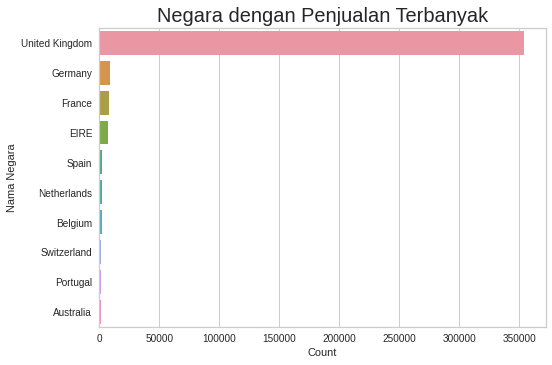

In [ ]:
x = df_eda['Country'].value_counts().head(10)
sb.barplot(x = x.values, y = x.index, )
plt.title('Negara dengan Penjualan Terbanyak', fontsize = 20)
plt.xlabel('Count')
plt.ylabel('Nama Negara')

In [ ]:
df_eda['TotalPrice'] = df_eda['Quantity']*df_eda['UnitPrice']
df_eda['Tahun'] = pd.DatetimeIndex(df_eda['InvoiceDate']).year
df_eda['Bulan'] = pd.DatetimeIndex(df_eda['InvoiceDate']).month

In [ ]:
px.bar(df_eda[['InvoiceDate','TotalPrice']].set_index('InvoiceDate').resample('M').sum().reset_index(), x='InvoiceDate', y='TotalPrice', title = 'Total Revenue per month')

In [ ]:
px.pie(df_eda.groupby('Country').TotalPrice.sum().reset_index()[:10], values='TotalPrice', names='Country', title='Negara dengan hasil penjualan terendah')

In [ ]:
px.pie(df_eda.groupby('Country').TotalPrice.sum().reset_index()[20:], values='TotalPrice', names='Country', title='Negara dengan hasil penjualan tertinggi')

# Data Preparation

###Membuang null value atau data yang bolong pada dataset

In [ ]:
df = df[~df['CustomerID'].isna()]
df = df[~df['InvoiceNo'].isna()]
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]
# Menghilangkan null karena data yang null akan mempengaruhi hasil clustering, dikhawatirkan dapat mengubah sebagian besar clustering yang telah dilakukan.

In [ ]:
df.shape

(397884, 8)

###Membuat kolom baru bernama TotalPrice dengan TotalPrice = Quantity x UnitPrice

In [ ]:
df['TotalPrice']=df['Quantity']*df['UnitPrice']
#Pembuatan TotalPrice dilakukan dengan tujuan mempermudah dalam membuat model monetary.

###Mengagregasi data sesuai InvoiceNo, InvoiceDate,CustomerID

In [ ]:
df_agg = df.groupby(['InvoiceNo','InvoiceDate','CustomerID','Country']).agg({'Quantity': 'sum','UnitPrice':'sum','TotalPrice':'sum'})
#agregasi data menggunakan fitur-fitur yang diperlukan saja

In [ ]:
df_agg.head()

,,,,Quantity,UnitPrice,TotalPrice
InvoiceNo,InvoiceDate,CustomerID,Country,,,
536365,2010-12-01 08:26:00,17850.0,United Kingdom,40,27.37,139.12
536366,2010-12-01 08:28:00,17850.0,United Kingdom,12,3.70,22.20
536367,2010-12-01 08:34:00,13047.0,United Kingdom,83,58.24,278.73
536368,2010-12-01 08:34:00,13047.0,United Kingdom,15,19.10,70.05
536369,2010-12-01 08:35:00,13047.0,United Kingdom,3,5.95,17.85


###Membuat RFM Model

In [ ]:
now = dt.date(2011,12,9)
#tanggal terakhir pada dataset

In [ ]:
df['InvoiceDate'] = pd.DatetimeIndex(df['InvoiceDate']).date
df.head()
#Mengubah format tanggal dataset menjadi tanggal saja tidak diikuti jam.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34


In [ ]:
recency_df = df.groupby(by='CustomerID', as_index=False)['InvoiceDate'].max()
recency_df.columns = ['CustomerID','LastPurchase']
recency_df.head()
#Pembuatan Lastpurchase denngan menentukan tanggal max pada satu customer

,CustomerID,LastPurchase
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [ ]:
recency_df['Recency'] = recency_df['LastPurchase'].apply(lambda x: (now - x).days)
recency_df.head()
#pengurangan tangal now dengan lastpurchase untuk membuat model Recency.

,CustomerID,LastPurchase,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [ ]:
recency_df.drop('LastPurchase',axis=1,inplace=True)
#Membuang fitur LastPurchase karena sudah tidak dibutuhkan.

######Frequency

In [ ]:
df2 = df
df2.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], inplace=True) 
#Menghilangkan data duplikat pada dataframe

In [ ]:
frequency_df = df2.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
#Menghitung jumlah transaksi tiap satu customer.

In [ ]:
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


######Monetary

In [ ]:
monetary_df = df.groupby(by='CustomerID',as_index=False)['TotalPrice'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()
#Menghitung toatl uang yang dikelauarkan oleh satu customer.

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,163.16
2,12348.0,331.36
3,12349.0,15.00
4,12350.0,25.20


######RFM Table

In [ ]:
rfm_tmp = recency_df.merge(frequency_df,on='CustomerID')
rfm_df = rfm_tmp.merge(monetary_df,on='CustomerID')
rfm_df.head()
#Menggabungkan ketiga model yang telah dibuat

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,163.16
2,12348.0,75,4,331.36
3,12349.0,18,1,15.00
4,12350.0,310,1,25.20


In [ ]:
rfm_df['Recency'] = rfm_df["Recency"] + 1
rfm_df.describe()
#Penambahan 1 pada recency agar tidak ada nilai 0.

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,93.059474,4.272015,296.914539
std,1721.808492,100.012264,7.697998,3128.698664
min,12346.000000,1.000000,1.000000,0.390000
25%,13813.250000,18.000000,1.000000,17.700000
50%,15299.500000,51.000000,2.000000,47.050000
75%,16778.750000,142.750000,5.000000,130.102500
max,18287.000000,374.000000,209.000000,168471.250000


In [ ]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,163.16
2,12348.0,76,4,331.36
3,12349.0,19,1,15.00
4,12350.0,311,1,25.20


######Menghilangkan outlier pada monetary

In [ ]:
Q1 = rfm_df.Monetary.quantile(0.25)
Q3 = rfm_df.Monetary.quantile(0.75)
IQR = Q3 - Q1
rfm_df = rfm_df[(rfm_df.Monetary >= (Q1 - 1.5*IQR)) & (rfm_df.Monetary <= (Q3 + 1.5*IQR))]
rfm_df.describe()
#Re-use kode dari https://www.kaggle.com/code/dogruom/rfm-customer-segmentation-with-k-means dengan tujuan untuk menghilangkan outlier agar proses clustering lebih valid.

,CustomerID,Recency,Frequency,Monetary
count,3841.000000,3841.000000,3841.000000,3841.000000
mean,15312.821140,99.221557,3.010674,63.434186
std,1711.373503,101.767339,2.858310,65.253224
min,12347.000000,1.000000,1.000000,0.390000
25%,13844.000000,22.000000,1.000000,16.500000
50%,15314.000000,58.000000,2.000000,38.040000
75%,16790.000000,158.000000,4.000000,86.400000
max,18287.000000,374.000000,39.000000,297.250000


In [ ]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
1,12347.0,3,7,163.16
3,12349.0,19,1,15.00
4,12350.0,311,1,25.20
6,12353.0,205,1,19.90
7,12354.0,233,1,20.80


######Normalisasi MinMax pada rfm_df

In [ ]:
minmax = MinMaxScaler()

In [ ]:
rfm_df['m_Recency'] = (rfm_df["Recency"]-rfm_df["Recency"].min())/(rfm_df["Recency"].max()-rfm_df["Recency"].min())
rfm_df['m_Frequency'] = (rfm_df["Frequency"]-rfm_df["Frequency"].min())/(rfm_df["Frequency"].max()-rfm_df["Frequency"].min())
rfm_df['m_Monetary'] = (rfm_df["Monetary"]-rfm_df["Monetary"].min())/(rfm_df["Monetary"].max()-rfm_df["Monetary"].min())
rfm_df.head()
#Minmax digunakan untuk membuat data yang bermacam-macam dari satuan hingga ribuan menjadi data yang berskala 0-1 agar dapat mempermudah proses clustering dengan KMeans, Spectral, dan agglomerative.
# Re-use kode dari https://stackoverflow.com/questions/48178884/min-max-normalisation-of-a-numpy-array dengan modifikasi.

,CustomerID,Recency,Frequency,Monetary,m_Recency,m_Frequency,m_Monetary
1,12347.0,3,7,163.16,0.005362,0.157895,0.548306
3,12349.0,19,1,15.00,0.048257,0.000000,0.049215
4,12350.0,311,1,25.20,0.831099,0.000000,0.083575
6,12353.0,205,1,19.90,0.546917,0.000000,0.065721
7,12354.0,233,1,20.80,0.621984,0.000000,0.068753


In [ ]:
df = rfm_df
df.head(10)

,CustomerID,Recency,Frequency,Monetary,m_Recency,m_Frequency,m_Monetary
1,12347.0,3,7,163.16,0.005362,0.157895,0.548306
3,12349.0,19,1,15.00,0.048257,0.000000,0.049215
4,12350.0,311,1,25.20,0.831099,0.000000,0.083575
6,12353.0,205,1,19.90,0.546917,0.000000,0.065721
7,12354.0,233,1,20.80,0.621984,0.000000,0.068753
8,12355.0,215,1,30.00,0.573727,0.000000,0.099744
9,12356.0,23,3,153.90,0.058981,0.052632,0.517112
10,12357.0,34,1,19.80,0.088472,0.000000,0.065384
11,12358.0,2,2,157.80,0.002681,0.026316,0.530250
12,12359.0,58,4,80.70,0.152815,0.078947,0.270532


#Modelling

###Elbow Method dengan inertia untuk model Recency

Text(0.5, 0, 'n_clusters')

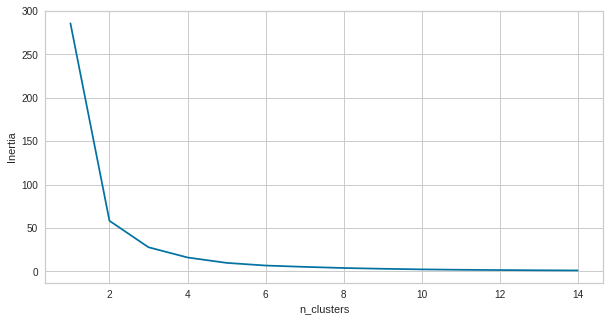

In [ ]:
score = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(np.array(df['m_Recency']).reshape(-1, 1))
    score.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), score)
plt.ylabel("Inertia")
plt.xlabel("n_clusters")

###Elbow Method dengan Inertia untuk Model Frequency

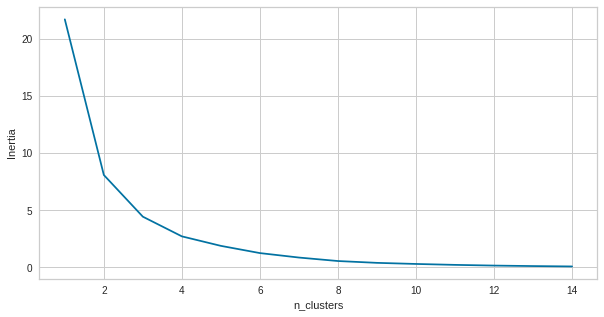

In [ ]:
score = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(np.array(df['m_Frequency']).reshape(-1, 1))
    score.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), score)
plt.ylabel("Inertia")
plt.xlabel("n_clusters");

###Elbow Method dengan Inertia untuk Model Monetary

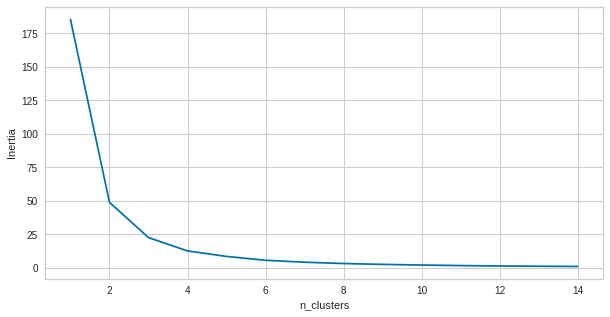

In [ ]:
score = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(np.array(df['m_Monetary']).reshape(-1, 1))
    score.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 15), score)
plt.ylabel("Inertia")
plt.xlabel("n_clusters");

###Kmeans

Dengan samanya hasil elbow method ketiga model yang digunakan, maka penggunaan kmeans langsung dilakukan pada ketiga fitur, yakni recency, frequency, dan monetary yang telah dinormalisasikan dengan minmax dengan tujuan untuk membuat skala 0-1 pada semua nilai pada tabel.

In [ ]:
df_kmeans = df[['m_Recency','m_Frequency','m_Monetary']]

In [ ]:
test_kmeans = KMeans(n_clusters=4)
test_kmeans.fit(df_kmeans)
# Kode yang digunakan dari https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html dengan sedikit modifikasi

KMeans(n_clusters=4)

In [ ]:
df_kmeans['Cluster'] = test_kmeans.labels_
df_kmeans.head()
# Kode yang digunakan dari https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html dengan sedikit modifikasi

<ipython-input-309-77e5a42090fe>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,m_Recency,m_Frequency,m_Monetary,Cluster
1,0.005362,0.157895,0.548306,0
3,0.048257,0.000000,0.049215,1
4,0.831099,0.000000,0.083575,2
6,0.546917,0.000000,0.065721,3
7,0.621984,0.000000,0.068753,2


In [ ]:
df_kmeans['Cluster'] = df_kmeans['Cluster'] + 1
#Penambahan 1 dilakukan dengan tujuan membuat skala cluster dari 1-4

<ipython-input-310-d82e3d0b6805>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



######Visualisasi Hasil KMeans

      2    1    4    3
   1914  691  655  581


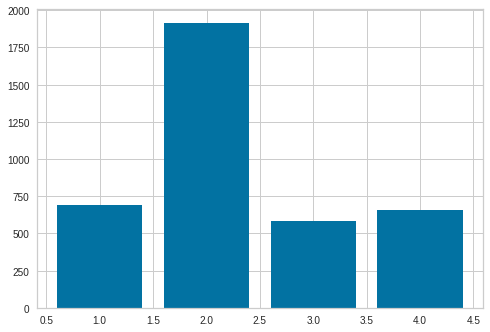

In [ ]:
barplot = dict(df_kmeans['Cluster'].value_counts())
bar_names = list(barplot.keys())
bar_values = list(barplot.values())
plt.bar(bar_names,bar_values)
print(pd.DataFrame(barplot, index=[' ']))

### Spectral Clustering

Sebagai metode pembanding, digunakan spectral clustering karena spectral menggunakan parameter yang sama dengan KMeans dan juga spectral cocok untuk clustering dalam jumlah yang tidak banyak

In [ ]:
df_sc = df[['m_Recency','m_Frequency','m_Monetary']]

In [ ]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=4)
sc.fit(df_sc) 
# Kode yang digunakan dari https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html dengan sedikit modifikasi

SpectralClustering(n_clusters=4)

In [ ]:
df_sc['Cluster'] = sc.labels_
df_sc.head()
# Kode yang digunakan dari https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html dengan sedikit modifikasi

<ipython-input-314-36b81b8c9183>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,m_Recency,m_Frequency,m_Monetary,Cluster
1,0.005362,0.157895,0.548306,0
3,0.048257,0.000000,0.049215,2
4,0.831099,0.000000,0.083575,1
6,0.546917,0.000000,0.065721,2
7,0.621984,0.000000,0.068753,1


In [ ]:
df_sc['Cluster'] = df_sc['Cluster'] + 1
#Penambahan 1 dilakukan dengan tujuan membuat skala cluster dari 1-4

<ipython-input-315-e3e9466ee72b>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



######Visualisasi Hasil Spectral Clustering

      3    2    1    4
   2584  555  455  247


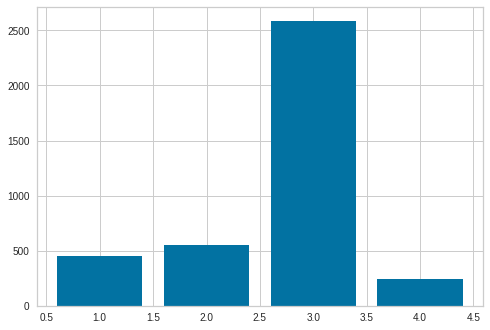

In [ ]:
barplot = dict(df_sc['Cluster'].value_counts())
bar_names = list(barplot.keys())
bar_values = list(barplot.values())
plt.bar(bar_names,bar_values)
print(pd.DataFrame(barplot, index=[' ']))

###Agglomerative Clustering

Sebagai metode pembanding yang kedua, penggunaan agglomerative clustering karena memiliki tipe yang berbeda dengan KMeans, yaitu clustering ini termasuk hierarchical clustering dan juga masih memiliki parameter yang tidak jauh berbeda dengan KMeans.

In [ ]:
df_ac = df[['m_Recency','m_Frequency','m_Monetary']]

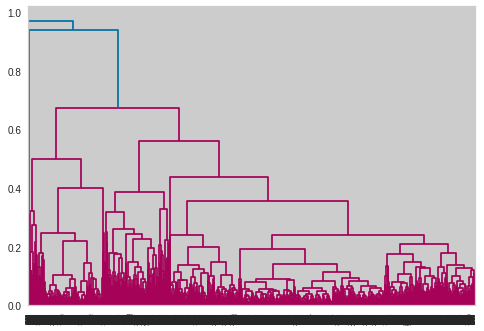

In [ ]:
mergings = linkage(df_ac, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()
#Re-use kode dari https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering#Step-4-:-Building-the-Model

In [ ]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels
#Re-use kode dari https://www.kaggle.com/code/hellbuoy/online-retail-k-means-hierarchical-clustering#Step-4-:-Building-the-Model

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
df_ac['cluster'] = cluster_labels
df_ac.head()

<ipython-input-320-66c4d89415ed>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,m_Recency,m_Frequency,m_Monetary,cluster
1,0.005362,0.157895,0.548306,0
3,0.048257,0.000000,0.049215,0
4,0.831099,0.000000,0.083575,1
6,0.546917,0.000000,0.065721,0
7,0.621984,0.000000,0.068753,1


In [ ]:
df_ac['cluster'] = df_ac['cluster'] + 1
#Tambah 1 agar skala cluster menjadi 1-4

<ipython-input-321-60d632fb70f6>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



######Visualisasi Agglomerative

      1    2  3  4
   3181  648  7  5


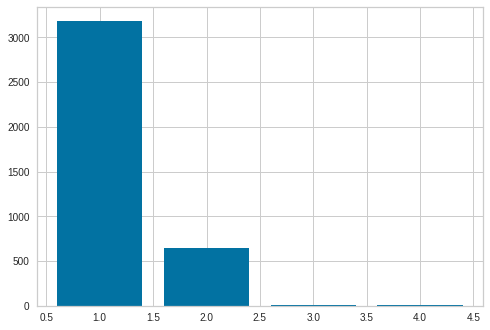

In [ ]:
barplot = dict(df_ac['cluster'].value_counts())
bar_names = list(barplot.keys())
bar_values = list(barplot.values())
plt.bar(bar_names,bar_values)
print(pd.DataFrame(barplot, index=[' ']))

######Deskripsi Customer Tiap Class

In [ ]:
kmeans_cluster1 = df_kmeans[df_kmeans['Cluster']==1]
kmeans_cluster2 = df_kmeans[df_kmeans['Cluster']==2]
kmeans_cluster3 = df_kmeans[df_kmeans['Cluster']==3]
kmeans_cluster4 = df_kmeans[df_kmeans['Cluster']==4]

In [ ]:
sc_cluster1 = df_sc[df_sc['Cluster']==1]
sc_cluster2 = df_sc[df_sc['Cluster']==2]
sc_cluster3 = df_sc[df_sc['Cluster']==3]
sc_cluster4 = df_sc[df_sc['Cluster']==4]

In [ ]:
ac_cluster1 = df_ac[df_ac['cluster']==1]
ac_cluster2 = df_ac[df_ac['cluster']==2]
ac_cluster3 = df_ac[df_ac['cluster']==3]
ac_cluster4 = df_ac[df_ac['cluster']==4]

In [ ]:
kmeans_cluster1.describe()

,m_Recency,m_Frequency,m_Monetary,Cluster
count,691.000000,691.000000,691.000000,691.0
mean,0.103495,0.145441,0.601634,1.0
std,0.117905,0.109682,0.175879,0.0
min,0.000000,0.000000,0.294246,1.0
25%,0.024129,0.078947,0.456377,1.0
50%,0.061662,0.131579,0.567709,1.0
75%,0.150134,0.184211,0.726285,1.0
max,0.718499,1.000000,1.000000,1.0


In [ ]:
kmeans_cluster2.describe()

,m_Recency,m_Frequency,m_Monetary,Cluster
count,1914.000000,1914.000000,1914.000000,1914.0
mean,0.100675,0.043860,0.132798,2.0
std,0.071005,0.049933,0.095441,0.0
min,0.000000,0.000000,0.000000,2.0
25%,0.042895,0.000000,0.049763,2.0
50%,0.085791,0.026316,0.115458,2.0
75%,0.155496,0.078947,0.202739,2.0
max,0.276139,0.394737,0.375800,2.0


In [ ]:
kmeans_cluster3.describe()

,m_Recency,m_Frequency,m_Monetary,Cluster
count,581.000000,581.000000,581.000000,581.0
mean,0.795425,0.006749,0.110328,3.0
std,0.118016,0.017781,0.137369,0.0
min,0.621984,0.000000,0.000101,3.0
25%,0.697051,0.000000,0.038941,3.0
50%,0.774799,0.000000,0.058310,3.0
75%,0.884718,0.000000,0.117934,3.0
max,1.000000,0.157895,0.934818,3.0


In [ ]:
kmeans_cluster4.describe()

,m_Recency,m_Frequency,m_Monetary,Cluster
count,655.000000,655.000000,655.000000,655.0
mean,0.435262,0.022700,0.124746,4.0
std,0.098773,0.029352,0.110051,0.0
min,0.265416,0.000000,0.000876,4.0
25%,0.345845,0.000000,0.049215,4.0
50%,0.436997,0.026316,0.086606,4.0
75%,0.514745,0.026316,0.168463,4.0
max,0.624665,0.210526,0.601664,4.0


###Visualisasi Hasil Modelling

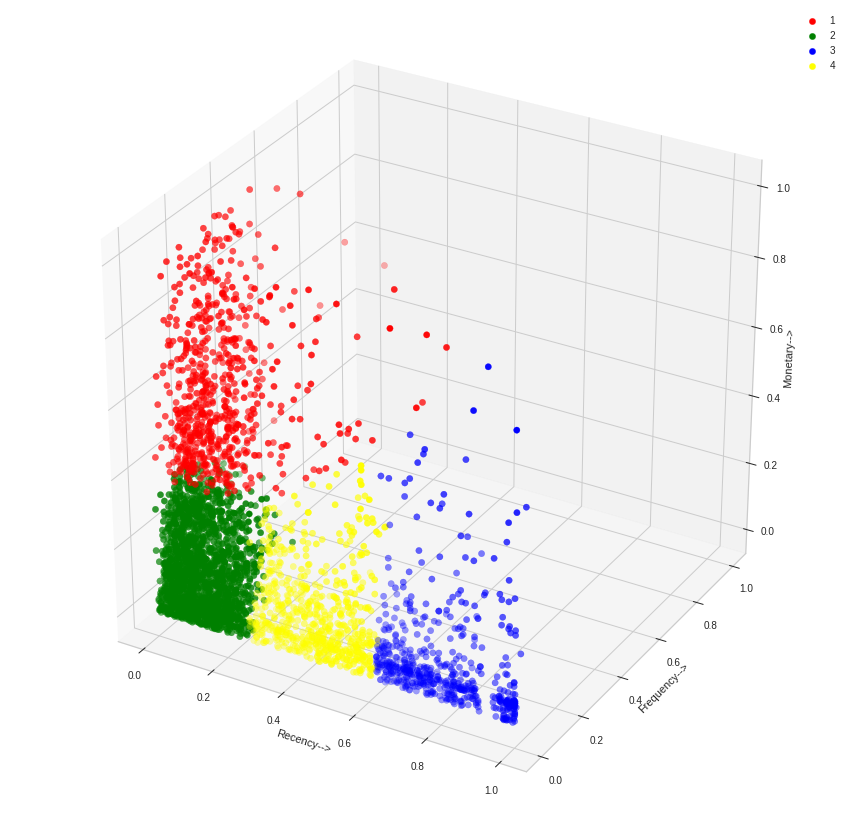

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(kmeans_cluster1['m_Recency'], kmeans_cluster1['m_Frequency'], kmeans_cluster1['m_Monetary'], s = 40 , color = 'red', label = "1")
ax.scatter(kmeans_cluster2['m_Recency'], kmeans_cluster2['m_Frequency'], kmeans_cluster2['m_Monetary'], s = 40 , color = 'green', label = "2")
ax.scatter(kmeans_cluster3['m_Recency'], kmeans_cluster3['m_Frequency'], kmeans_cluster3['m_Monetary'], s = 40 , color = 'blue', label = "3")
ax.scatter(kmeans_cluster4['m_Recency'], kmeans_cluster4['m_Frequency'], kmeans_cluster4['m_Monetary'], s = 40 , color = 'yellow', label = "4")
ax.set_xlabel('Recency-->')
ax.set_ylabel('Frequency-->')
ax.set_zlabel('Monetary-->')
ax.legend()
plt.show()

Deskripsi karakteristik customer terdapat pada bagian Feedback.

###Perbandingan Ketiga Model

KMeans dan Spectral menghasilkan cluster dapat dikatakan mirip karena jumlah cluster terbanyak dipegang oleh customer 2. Hal ini disebabkan oleh persamaan karakteristik KMeans dan Spectral. Tetapi, perbedaan yang sangat signifikan antara clustering hasil KMeans dan Spectral dengan Agglomeartive. Hal ini disebabkan oleh perbedaan tipe cluster antara Agglomerative dengan kedua cluster lainnya.

#Evaluasi

######Menghitung Skor Silhouette

In [ ]:
df_sh = df_kmeans[['m_Recency', 'm_Frequency','m_Monetary']]
df_sh.head()

,m_Recency,m_Frequency,m_Monetary
1,0.005362,0.157895,0.548306
3,0.048257,0.000000,0.049215
4,0.831099,0.000000,0.083575
6,0.546917,0.000000,0.065721
7,0.621984,0.000000,0.068753


In [ ]:
K = range(2, 12)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df_sh)
    print(f'Silhouette Score KMeans Clustering for {k} clusters: {silhouette_score(df_sh, model.labels_)}')

Silhouette Score KMeans Clustering for 2 clusters: 0.506599307676363
Silhouette Score KMeans Clustering for 3 clusters: 0.528226513677065
Silhouette Score KMeans Clustering for 4 clusters: 0.4604338031652999
Silhouette Score KMeans Clustering for 5 clusters: 0.43016792423947664
Silhouette Score KMeans Clustering for 6 clusters: 0.44026344967290726
Silhouette Score KMeans Clustering for 7 clusters: 0.39011562723603493
Silhouette Score KMeans Clustering for 8 clusters: 0.3699036134110422
Silhouette Score KMeans Clustering for 9 clusters: 0.35343209337547116
Silhouette Score KMeans Clustering for 10 clusters: 0.3576489508641458
Silhouette Score KMeans Clustering for 11 clusters: 0.3583049951563494


In [ ]:
K = range(2, 12)
for k in K:
    model = SpectralClustering(n_clusters=k)
    model.fit(df_sc)
    print(f'Silhouette Score Spectral Clustering for {k} clusters: {silhouette_score(df_sc, model.labels_)}')

Silhouette Score Spectral Clustering for 2 clusters: 0.6950291530720972
Silhouette Score Spectral Clustering for 3 clusters: 0.7442635919239083
Silhouette Score Spectral Clustering for 4 clusters: 0.7962629150874947
Silhouette Score Spectral Clustering for 5 clusters: 0.7536468217942491
Silhouette Score Spectral Clustering for 6 clusters: 0.742211160757892
Silhouette Score Spectral Clustering for 7 clusters: 0.5351697317678035
Silhouette Score Spectral Clustering for 8 clusters: 0.5231390293597432
Silhouette Score Spectral Clustering for 9 clusters: 0.7214903864802167
Silhouette Score Spectral Clustering for 10 clusters: 0.7106034675110405
Silhouette Score Spectral Clustering for 11 clusters: 0.47483931400707663


In [ ]:
labels = df_ac['cluster']
print(f'Silhouette Score Agglomerative Clustering for 4 clusters: {silhouette_score(df_ac, model.labels_)}')

Silhouette Score Agglomerative Clustering for 4 clusters: 0.3609259420095403


###Visualisasi Silhouette

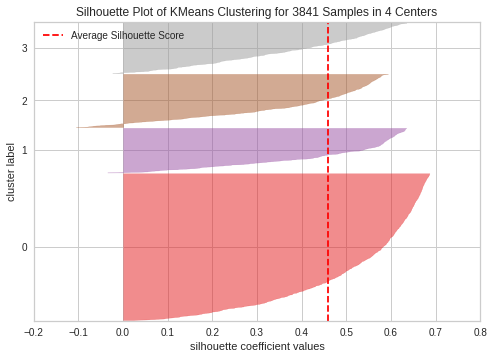

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model_3 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model_3)

visualizer.fit(df_sh)
visualizer.poof()

#Feedback

###Summary Terkait Model

Dari hasil modelling yang telah dilakukan, dapat disimpulkan terdapat 4 klaster dalam customer pada Online Retail dataset, yaitu:


*   Customer 1 : customer tipe 1 memiliki karakteristik mengeluarkan uang dalam jumlah yang paling kecil dalam perbelanjaan dibandingkan dengan ketiga cluster lainnya. Kemudian, jarak belanja mereka antara yang terbaru dengan perbelanjaan terakhir singkat yang berarti mereka akan kembali berbelanja dalam waktu dekat, tetapi total berapa kali mereka belanja tergolong sangat jarang karena rata-rata nilai dari frequencynya jauh di bawah ketiga klaster lainnya. Customer 1 ini perlu diberikan perhatian khusus agar mereka tidak hilang begitu saja
*   Customer 2 : customer tipe 2 memiliki karakteristik mengeluarkan uang dalam jumlah menengah dalam satu perbelanjaan. Kemudian, frekuensi belanja customer ini tergolong menengah dan jarak pembelian antara pembelian terbaru dengan pembelian terakhir tergolong lama dibandingkan dengan ketiga cluster lainnya sehingga customer ini dapat diharapkan untuk meningkatkan hasil penjualan. Diperlukan beberapa perrhatian khusus agar mereka meningkatkan pembelian untuk selanjutnya.
*   Customer 3 : customer tipe 3 memiliki karakteristik mengeluarkan uang yang sedang. Selain itu, frekuensi belanja customer ini tergolong menengah dan  jarak pembelian terbaru dengan pembelian terakhir juga tergolong menengah. Customer ini tergolong pada kelas menengah yang tidak memiliki karakteristik mencolok, tetapi customer ini masih dapat diharapkan untuk meningkatkan hasil penjualan. Diperlukan perhatian tambahan pada customer 3 agar mereka tetap melakukan belanja pada toko.
*   Customer 4 : customer tipe 4 memiliki karakteristik mengeluarkan uang yang besar. Kemudian, frekuensi belanja mereka yang tergolong tinggi. Jarak pembelian terbaru dengan pembelian terakhir tergolong menengah. Customer ini dapat diharapkan untuk meningkatkan hasil penjualan dan merupakan customer yang memberikan hasil penjualan terbesar dibandingkan ketiga cluster lainnya. Hal yang perlu dilakukan adalah tetap memberikan pelayanan sebaik mungkin agar customer 4 tetap melakukan pembelian.



###Rekomendasi untuk Model

Rekomendasi untuk model selanjutnya dapat menggunakan model selain RFM yang mungkin lebih cocok dengan kondisi pasar dan karakteristik customer. 

#Dashboard
https://datastudio.google.com/reporting/c00bcdc2-84a5-4306-8271-fedb34223988

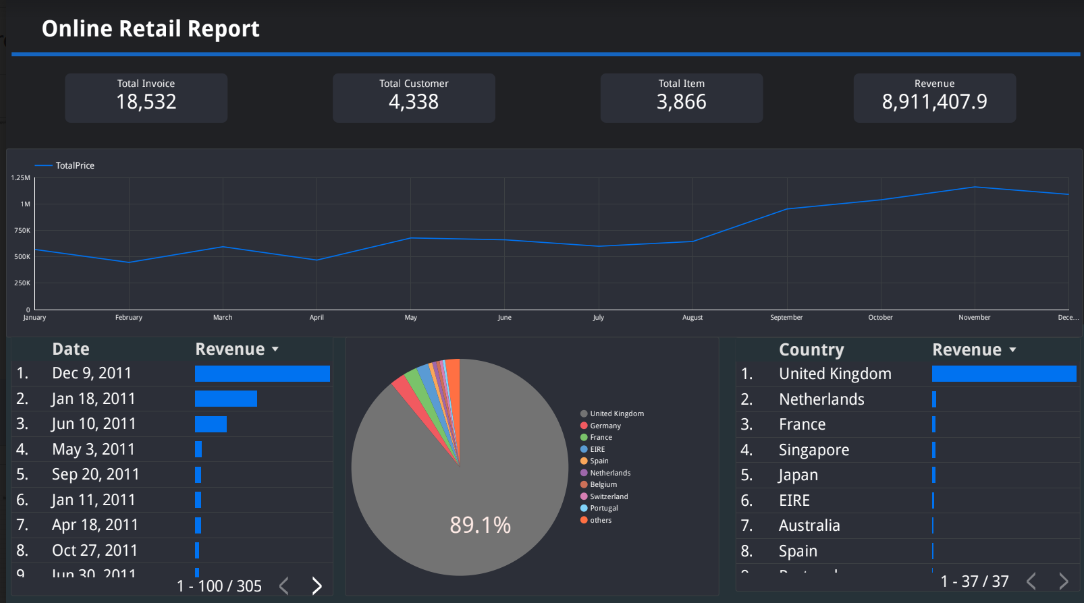

#Referensi

https://www.kaggle.com/code/evitaginiyatullina/online-retail-sales-eda

https://www.kaggle.com/code/naren3256kmeans-clustering-and-cluster-visualization-in-3d/notebook

https://www.kaggle.com/code/azizozmencustomer-segmentation-cohort-rfm-analysis-k-means

https://www.kaggle.com/code/dogruom/rfm-customer-segmentation-with-k-means

#Role Anggota

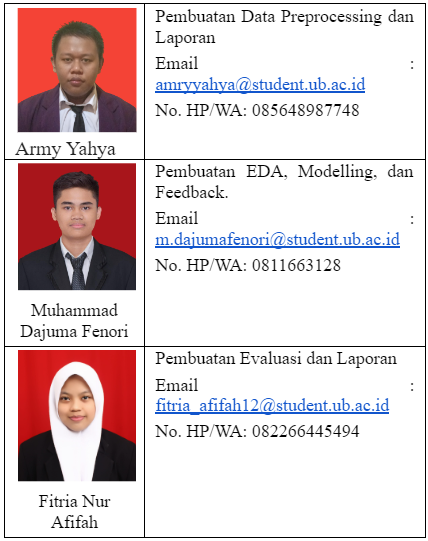